
[Учебный сайт](https://agricolamz.github.io/2022_da4l/%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.html) об анализе данных для лингвистов в R от Г.А. Мороза (спасибо ему огромное!)

[Учебный сайт](https://pozdniakov.github.io/tidy_stats/310-infer_stats.html) об анализе данных для лингвистов в R от И.С. Позднякова и О.Н. Ляшевской (спасибо им огромное!)

# О случайной величине

**Случайная величина** (random variable) – это переменная, которая в зависимости от случая принимает различные значения. Представьте себе машину, которая по требованию выдает какое-то случайное число (или даже несколько). Это и будет случайная величина.

Какие значения она может принимать и с какой частотой? Это зависит от закона, которым она описывается. Этот закон называется распределением вероятности.

Случайная переменная может принимать только какие-то конкретные значения (например, 3, 10, 0.25 или число пи) - **дискретное распределение**.

Случайная переменная может принимать любые значения (в каком-то диапазоне или же вообще любые) - случайная переменная имеет **непрерывное распределение**.

Может ли случайная переменная принимать значения с разной частотой? Если нет, то речь идет о **равномерном распределении** (uniform distribution). (Как у игрального кубика с вероятностью 1/6 для каждого из 6 исходов или монеты с вероятностью 1/2 для орла и решки). Может быть как дискретное, так и непрерывное равномерное распределение.

Разные распределения могут быть описаны с помощью **функций распределения**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm, binom, geom, poisson, lognorm
import pandas as pd

Справка о `plt.plot`

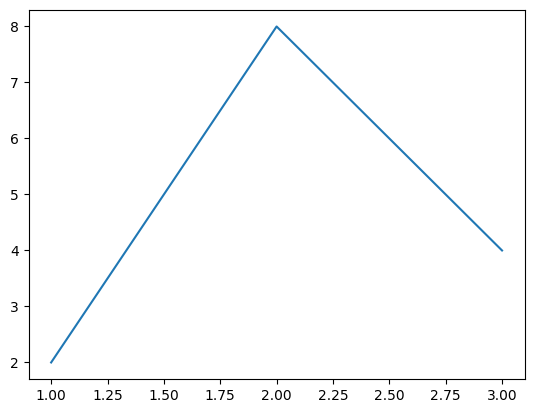

In [ ]:
x = np.array([1, 2, 3])
y = np.array([2, 8, 4])
plt.plot(x, y)

# О распределениях

## Нормальное распределение
Описывается двумя параметрами: среднее μ и стандартное отклонение σ

(Это параметры распределения в генеральной совокупности, а не в выборке)

### **PDF** - функция плотности (probability density function)

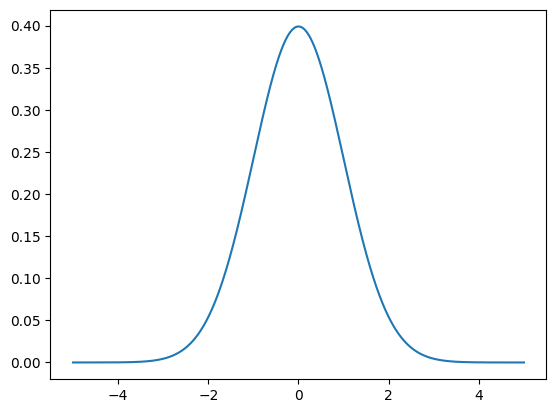

In [ ]:
# определили, для каких точек будем рисовать
x = np.arange(-5, 5, 0.001)

# опредилили распределения
plt.plot(x, norm.pdf(x, loc=0, scale=1))

In [ ]:
x = np.array([-4, -2, 0, 4])
norm.pdf(x, loc=0, scale=1)

array([1.33830226e-04, 5.39909665e-02, 3.98942280e-01, 1.33830226e-04])

**PDF** - функция плотности (probability density function)

Для дискретных распределений показывает вероятность того, что случайная величина имеет данное значение.

Для непрерывных распределений - вероятность того, что случайная величина окажется в определённом промежутке.

Соответственно, площадь под всей функцией плотности вероятности равна 1.

У нормального распределения параметры `loc` (μ, среднее) и `scale` (σ, стандартное отклонение).

Вот так выглядит функция:

![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/dnorm.png)

У других распределений могут быть другие параметры. [Здесь](https://www.math.wm.edu/~leemis/chart/UDR/UDR.html) можно посмотреть, какие бывают распределения и как они связаны друг с другом.

[Здесь](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions) можно посмотреть, какие распределения реализованы в scipy.stats.

Нарисуем несколько функций плотности для нормальных распределений с разными параметрами:

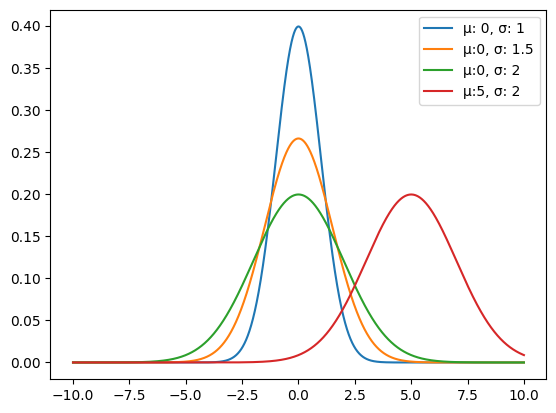

In [ ]:
# определили диапазон
x = np.arange (-10, 10, 0.001)

# опредилили распределения
plt.plot(x, norm.pdf(x, 0, 1), label='μ: 0, σ: 1')
plt.plot(x, norm.pdf(x, 0, 1.5), label='μ:0, σ: 1.5')
plt.plot(x, norm.pdf(x, 0, 2), label='μ:0, σ: 2')
plt.plot(x, norm.pdf(x, 5, 2), label='μ:5, σ: 2')

# добавили легенду
plt.legend()

Какие примеры нормального распределения вы можете придумать (кроме роста и веса людей)?

### **CDF** - функция накопленной плотности распределения (cumulative distribution function)

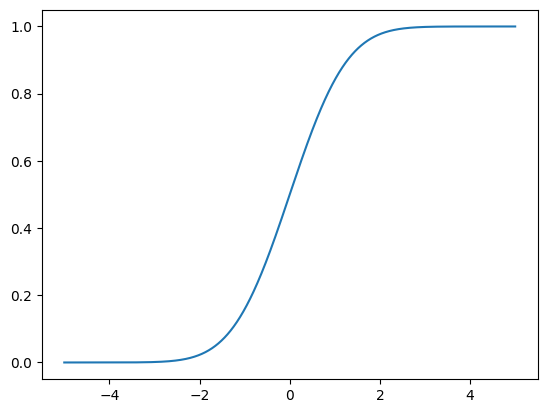

In [ ]:
x = np.arange(-5, 5, 0.001)
plt.plot(x, norm.cdf(x, loc=0, scale=1))

**CDF** - функция накопленной плотности распределения (cumulative distribution function)

Функция накопленной плотности распределения показывает вероятность того, что полученное случайное значение из распределения будет меньше искомого или равно ему.

Какова вероятность того, что полученное случайное значение IQ (μ=100, σ=15) будет меньше или равно 100? А 115?

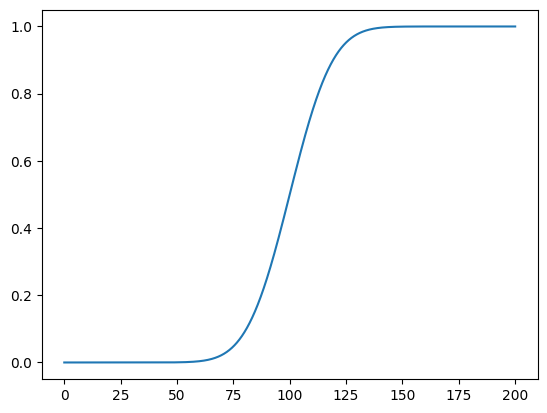

In [ ]:
x = np.arange(0, 200, 0.001)
plt.plot(x, norm.cdf(x, loc=100, scale=15))

In [ ]:
norm.cdf(115, loc=100, scale=15)

0.8413447460685429

### Квантильная функция

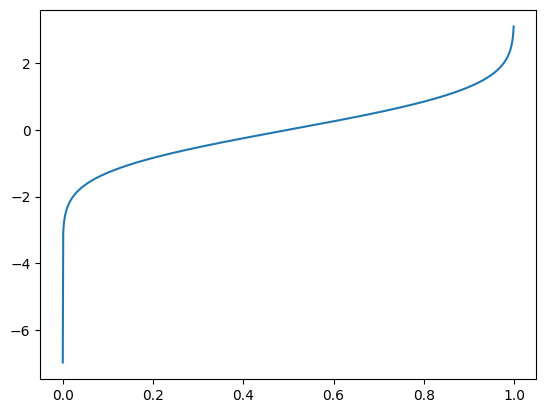

In [ ]:
x = np.arange(-5, 5, 0.001)
plt.plot(x, norm.ppf(x, loc=0, scale=1))

**Квантильная функция** (quantile function) или обратная функция накопленной плотности распределения (inverse cumulative distribution function)

Квантильная функция возвращает значение, которое по заданной вероятности случайная переменная не будет превышать. Поскольку квантильная функция – это функция от вероятности, квантильная функция определена на отрезке от 0 до 1

На какой вопрос это ответ? (про IQ)

In [ ]:
norm.ppf(0.75, loc=100, scale=15)

110.11734625294122

### Тренировка

Данные из базы данных фонетических инвентарей PHOIBLE (Moran, McCloy, and Wright 2014), достаточно сильно упрощая, можно описать нормальным распределением со средним 35 фонем и стандартным отклонением 13. Если мы ничего не знаем про язык, оцените с какой вероятностью, согласно этой модели произвольно взятый язык окажется в промежутке между 25 и 50 фонемами?

https://phoible.org/inventories

In [1]:
import pandas as pd

In [ ]:
! wget https://raw.githubusercontent.com/phoible/dev/master/data/phoible.csv

--2024-03-07 07:31:59--  https://raw.githubusercontent.com/phoible/dev/master/data/phoible.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24578868 (23M) [text/plain]
Saving to: ‘phoible.csv’

phoible.csv         100%[===================>]  23.44M   110MB/s    in 0.2s    

2024-03-07 07:32:00 (110 MB/s) - ‘phoible.csv’ saved [24578868/24578868]



In [ ]:
df = pd.read_csv('phoible.csv', low_memory=False)
df.head()

,InventoryID,Glottocode,ISO6393,LanguageName,SpecificDialect,GlyphID,Phoneme,Allophones,Marginal,SegmentClass,...,advancedTongueRoot,periodicGlottalSource,epilaryngealSource,spreadGlottis,constrictedGlottis,fortis,lenis,raisedLarynxEjective,loweredLarynxImplosive,click
0,1,kore1280,kor,Korean,NaN,0068,h,ç h ɦ,NaN,consonant,...,-,-,-,+,-,-,-,-,-,-
1,1,kore1280,kor,Korean,NaN,006A,j,j,NaN,consonant,...,-,+,-,-,-,-,-,-,-,-
2,1,kore1280,kor,Korean,NaN,006B,k,k̚ ɡ k,NaN,consonant,...,-,-,-,-,-,-,-,-,-,-
3,1,kore1280,kor,Korean,NaN,006B+02B0,kʰ,kʰ,NaN,consonant,...,-,-,-,+,-,-,-,-,-,-
4,1,kore1280,kor,Korean,NaN,006B+02C0,kˀ,kˀ,NaN,consonant,...,-,-,-,-,+,-,-,-,-,-


In [ ]:
phnum = df.groupby('InventoryID')['Phoneme'].count().to_frame()
phnum.head()

,Phoneme
InventoryID,
1,40
2,32
3,69
4,56
5,35


<Axes: xlabel='InventoryID'>

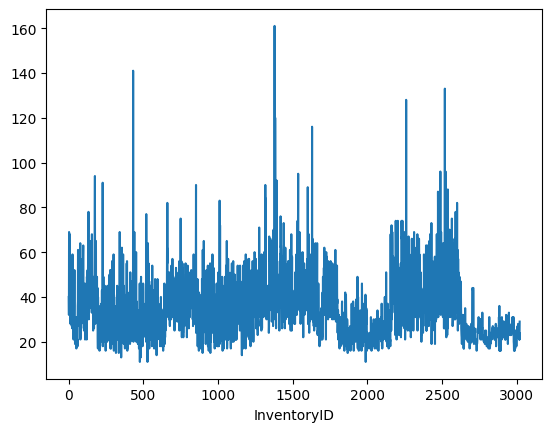

In [ ]:
df.groupby('InventoryID')['Phoneme'].count().plot()

In [ ]:
phnum.describe()

,Phoneme
count,3020.000000
mean,34.928477
std,13.366004
min,11.000000
25%,25.000000
50%,33.000000
75%,42.000000
max,161.000000


In [ ]:
phnum.groupby('Phoneme')['Phoneme'].count()

Phoneme
11      3
13      2
14      3
15      6
16     26
       ..
120     1
128     1
133     1
141     1
161     1
Name: Phoneme, Length: 85, dtype: int64

<Axes: xlabel='Phoneme'>

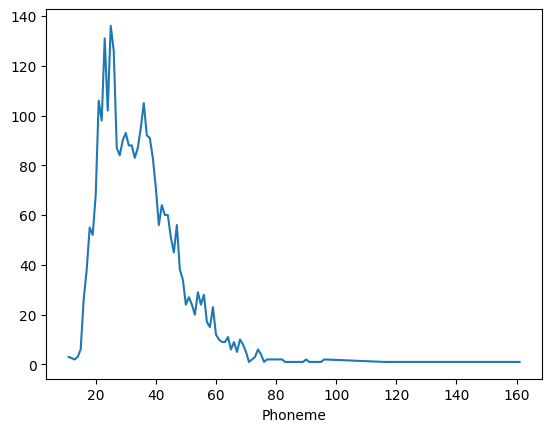

In [ ]:
phnum.groupby('Phoneme')['Phoneme'].count().plot()

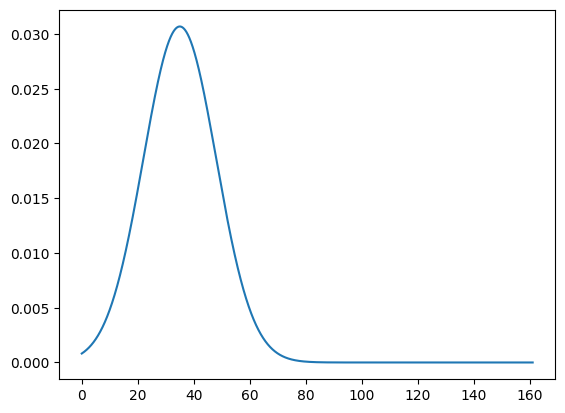

In [ ]:
x = np.arange(0, 161, 0.001)
plt.plot(x, norm.pdf(x, 35, 13))

In [ ]:
# ваш код
norm.cdf(50, 35, 13) - norm.cdf(25, 35, 13)

0.6548402121789492

Какие есть минусы у применения такой модели к этим данным?

- Количество фонем в языке дискретно, а мы взяли распределение непрерывной случайной величины. (Наша модель позволяет языку иметь 20,5 фонем.)
- Количество фонем ограничено как минимум слева. Меньше 0 фонем быть не может, а наша модель позволяет иметь отрицательное количество.

## Биномиальное распределение

Биномиальное распределение — распределение количества успехов экспериментов Бернулли из `n` попыток при вероятности успеха `p`.


Переформулировка:
- `n` раз провели эксперимент
- эксперимент Бернулли - эксперимент с двумя возможными исходами (успех и неудача), вероятность успеха при каждом повторе одинаковая, эксперименты между собой независимы
- успех - эксперимент закончился событием A
- `p` - вероятность, что во время эксперимента произойдёт A

Например: подкидывают монетку 5 раз (n=5), каждый из 5ти экспериментов заканчивается успехом (орёл) или неудачей (решка), результаты 5ти подкидываний друг на друга не влияют, вероятность выпадения орла внутри одного эксперимента 1/2 (p=0.5)

**Как устроена эта формула?**

![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/formula_binom.png)


Посмотрим на примере.

Подбрасываем монетку 3 раза (n=3). Какова вероятность, что выпадет 2 орла (k=2)?

Возможные исходы: 101, 110, 011 - есть 3 подходящих сочетания (1 - успех - орёл)

- Вероятность получить 101 - это \\(p*(1-p)*p\\)
- Вероятность получить 110 - это \\(p*p*(1-p)\\)
- Вероятность получить 011 - это \\((1-p)*p*p\\)

То есть каждый раз \\(p^2*(1-p)^1\\), а если обобщать, то \\(p^k*(1-p)^{n-k}\\)

Вероятность 2 орлов за 3 подбрасывания: \\(P(2|3, p) = 3*p^2*(1-p)^1\\)

В итоге у нас есть \\(P(k|n, p) = кол-во\_сочетаний*p^k*(1-p)^{n-k}\\)

**Как же узнать кол-во подходящих сочетаний?**

Это \\(\frac{n!}{k!(n-k)!} = (^n_k) = C^k_n\\).

Читается "це из эн по ка".

Это формула для подсчёта количества способов

Есть 4 слота (_ _ _ _).
- 0 орлов - 1 сочетание (0000)
- 1 орёл - 4 сочетания (0001, 0010, 0100, 1000)
- 2 орла - 6 сочетаний
- 3 орла - 4 сочетания
- 4 орла - 1 сочетание

Если мы будем постепенно ставить орлов (сначала одного, потом второго, потом 3его и т.д), количество способов поставить k орлов, запоминая порядок постановки, будет \\(\frac{n!}{(n-k)!}\\).

Если 4 слота, то есть 4 способа поставить первого, 3 второго, когда первый уже стоит (потому что один слот уже заняли), 2 третьего, 1 четвёртого => \\(4*3*2*1 = 4!\\)

Поставить n из n, помня порядок: \\(n*(n-1)*(n-2)*...*(n-n) = n!\\)

Поставить k из n, помня порядок: \\(n*(n-1)*(n-2)*...*(n-k) = \frac{n*(n-1)*(n-2)*...*(n-n)}{(n-k)*(n-k-1)*(n-k-2)*...*(n-n)} = \frac{n!}{(n-k)!}\\)


Но нам неважен порядок, в котором мы ставим орлов в слоты: 1001 и 1001 для нас одно и то же, неважно в каком порядке появлялись орлы. Есть 4! способов поставить 4х орлов, если учитывать порядок постановки (куда первый, куда второй и т.д.). При этом итоговое сочетание ровно одно (1111).

Сколько способов расставить k орлов по k местам? Ответ: \\(k!\\)

Значит, кол-во подходящих сочетаний: \\(\frac{n!}{(n-k)!*k!}\\)

Итого: \\(P(k|n, p) = \frac{n!}{(n-k)!*k!}*p^k*(1-p)^{n-k}\\)


<BarContainer object of 500 artists>

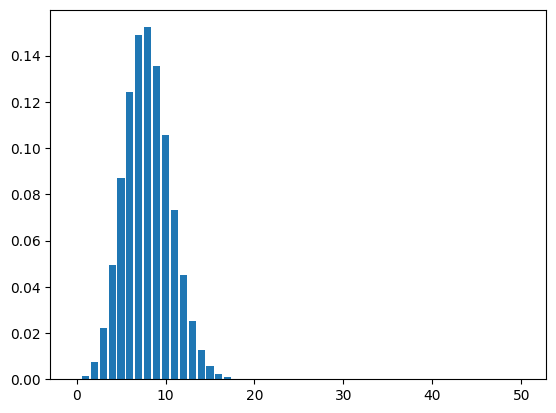

In [ ]:
x = np.arange(0, 50, 0.1)

# pmf - probability mass function
# это аналог pdf для дискретных распределений

plt.bar(x, binom.pmf(x, n = 50, p = 0.16))

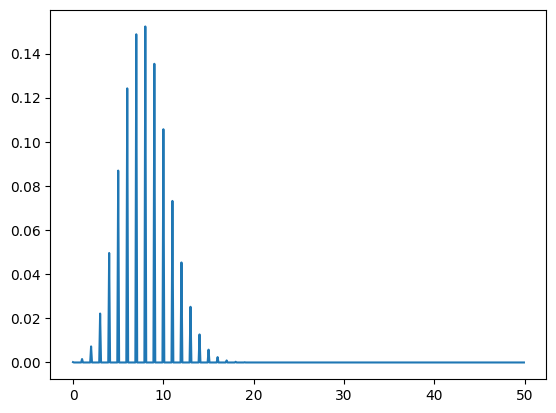

In [ ]:
x = np.arange(0, 50, 0.1)
plt.plot(x, binom.pmf(x, n = 50, p = 0.16))

### Тренировка
Немного упрощая данные из статьи (Rosenbach 2003: 394), можно сказать что носители британского английского предпочитают s-генитив (90%) of-генитиву (10%). Какова вероятность, согласно этим данным, что в интервью британского актера из 118 контекстов будет 102 s-генитивов?

In [ ]:
binom.pmf(102, n=118, p=0.9)

0.0501022014174753

Какое значение количества s-генитивов наиболее ожидаемо, согласно этой модели?

(90.0, 118.0)

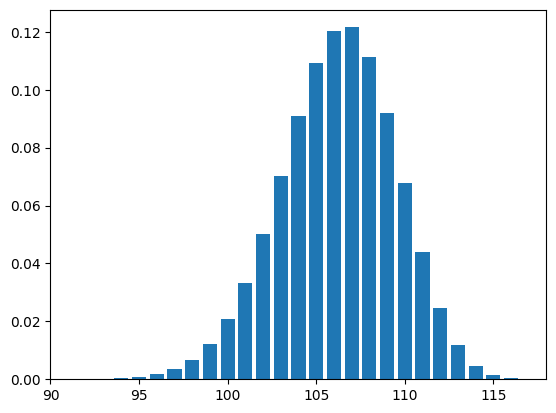

In [ ]:
x = np.arange(0, 118, 1)
plt.bar(x, binom.pmf(x, n = 118, p = 0.9))
plt.xlim(90, 118)

In [ ]:
x = np.arange(0, 118, 1)
max_p = max(binom.pmf(x, n = 118, p = 0.9))
list(binom.pmf(x, n = 118, p = 0.9)).index(max_p)

107

## Геометрическое распределение

Геометрическое распределение — распределение количества экспериментов Бернулли (с вероятностью успеха `p` до первого успеха).

![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/formula_geom.png)

<BarContainer object of 500 artists>

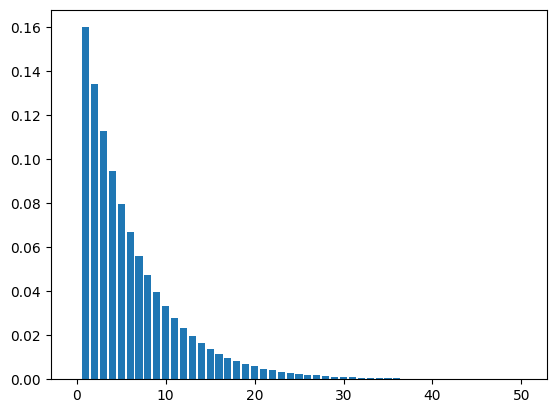

In [ ]:
x = np.arange(0, 50, 0.1)

# pmf - probability mass function
# это аналог pdf для дискретных распределений

plt.bar(x, geom.pmf(x, p = 0.16))

### Тренировка
Приняв модель из (Rosenbach 2003: 394), какова вероятность, что в интервью с британским актером первый of-генитив будет третьим по счету?

In [ ]:
# ваш код
geom.pmf(3, p = 0.1)  # успех третим

0.08100000000000002

## Распределение Пуассона

Распределение дискретной переменной, описывающее вероятность получения k успехов за заданный интервал времени при известном среднем количестве успехов за определенный интервал `λ`.

![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/formula_poisson.png)

Параметр λ в модели Пуассона одновременно является и средним, и дисперсией.

<BarContainer object of 30 artists>

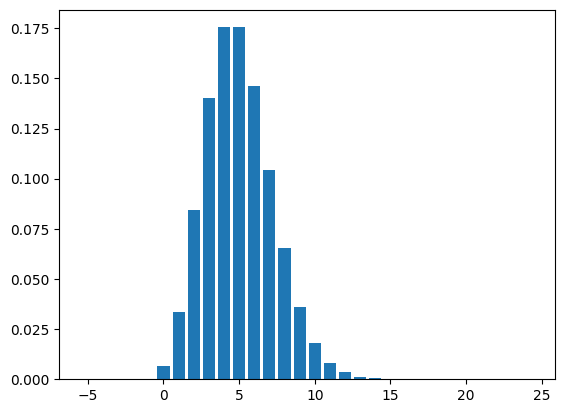

In [ ]:
x = np.arange(-5, 25, 1)
plt.bar(x, poisson.pmf(x, mu=5))  # λ=5

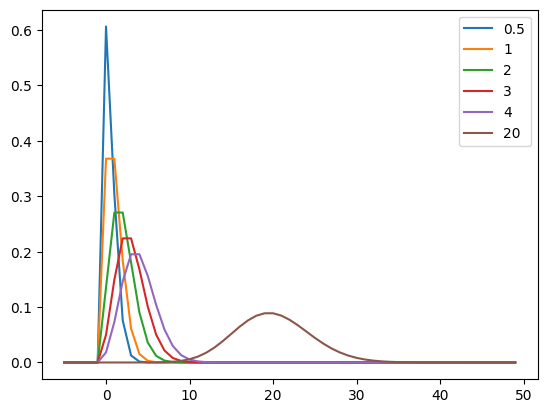

In [ ]:
# определили диапазон
x = np.arange(-5, 50, 1)

# опредилили распределения
plt.plot(x, poisson.pmf(x, mu=0.5), label='0.5')
plt.plot(x, poisson.pmf(x, mu=1), label='1')
plt.plot(x, poisson.pmf(x, 2), label='2')
plt.plot(x, poisson.pmf(x, 3), label='3')
plt.plot(x, poisson.pmf(x, mu=4), label='4')
plt.plot(x, poisson.pmf(x, mu=20), label='20')


# добавили легенду
plt.legend()

### Тренировка

Магазин продает в среднем 3 яблока в день. Какова вероятность того, что они продадут 5 яблок в данный день?

In [ ]:
poisson.pmf(5, 3)

0.10081881344492458

Один магазин продает в среднем 15 банок тунца в день. Какова вероятность того, что этот магазин продаст меньше 20 банок тунца в данный день?

In [ ]:
poisson.cdf(20, 15)

0.9170290899685397

Один магазин продает в среднем 15 банок тунца в день. Какова вероятность того, что этот магазин продаст более 20 банок тунца в данный день?

In [ ]:
1-poisson.cdf(20, 15)

0.08297091003146029

In [ ]:
andic_syllables = pd.read_csv("https://raw.githubusercontent.com/agricolamz/2021_da4l/master/data/andic_syllables.csv")
andic_syllables

,language,n_syllables,count
0,Akhvakh,1,129
1,Akhvakh,2,2011
2,Akhvakh,3,2013
3,Akhvakh,4,2285
4,Akhvakh,5,1396
...,...,...,...
88,Tindi,4,935
89,Tindi,5,195
90,Tindi,6,29
91,Tindi,7,2


In [ ]:
andic_syllables['language'].unique()

array(['Akhvakh', 'Andi', 'Bagvalal', 'Botlikh', 'Chamalal', 'Godoberi',
       'Karata', 'Tindi'], dtype=object)

<BarContainer object of 13 artists>

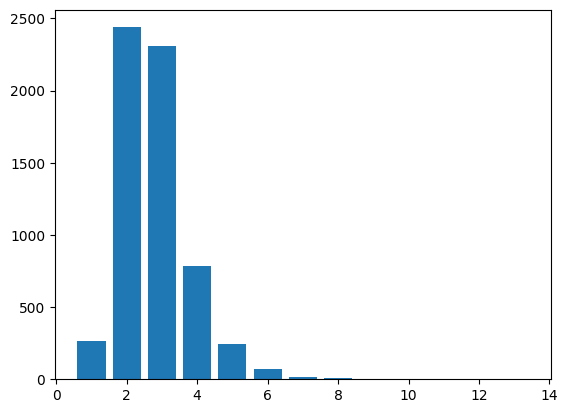

In [ ]:
andic_syllables = pd.read_csv("https://raw.githubusercontent.com/agricolamz/2021_da4l/master/data/andic_syllables.csv")
plt.bar(andic_syllables[andic_syllables['language']=='Andi']['n_syllables'],
        andic_syllables[andic_syllables['language']=='Andi']['count'])
# андийские данные можно описать при помощи распределения Пуассона с параметром λ = 2.783

<BarContainer object of 15 artists>

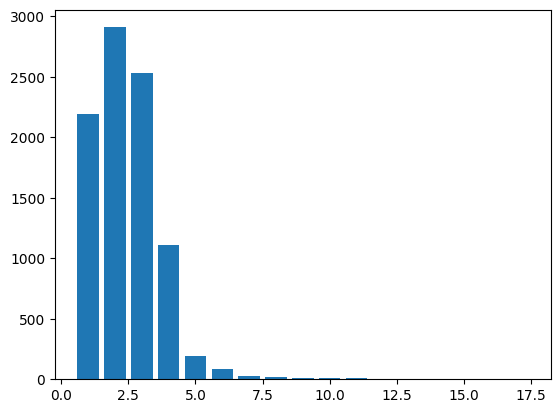

In [ ]:
plt.bar(andic_syllables[andic_syllables['language']=='Bagvalal']['n_syllables'],
        andic_syllables[andic_syllables['language']=='Bagvalal']['count'])

## Логнормальное распределение

![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/formula_lognorm.png)

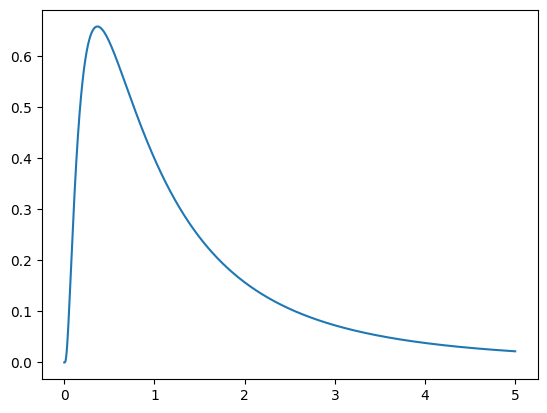

In [ ]:
x = np.arange(0, 5, 0.001)
mu, sigma = 0, 1
plt.plot(x, lognorm.pdf(x, s=sigma, scale=np.exp(mu)))

Если случайная величина Х имеет логнормальное распределение, то её логарифм Y=LN(X) имеет нормальное распределение. Справедливо и обратное утверждение: если случайная величина Y имеет нормальное распределение, то случайная величина X=EXP(Y) имеет логнормальное распределение.



[1.13558413 3.37833855 0.39758473 0.57329615 1.98687915 4.42690426
 0.2596572  0.22518316 2.89782596 0.71250636 0.80927666 2.78141856
 0.3595562  0.58766676 1.61809316 0.52056428 1.19536107 0.62636853
 1.20564611 1.15250182]


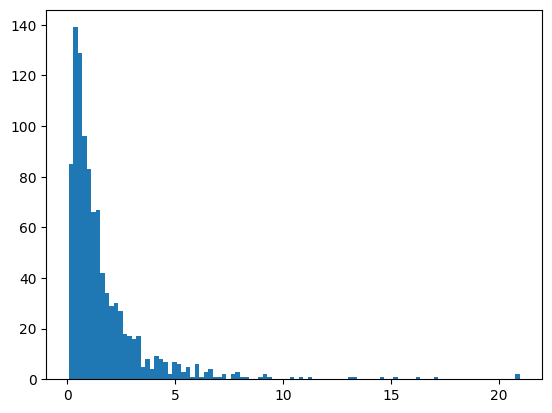

In [ ]:
# Знакомьтесь: rvs даёт рандомную выборку с заданным распределением
X = lognorm(s=sigma, scale=np.exp(mu)).rvs(size=1000)
print(X[:20])
plt.hist(X, bins=100)
plt.show()

Логарифмы чисел в этой выборке распределены нормально.

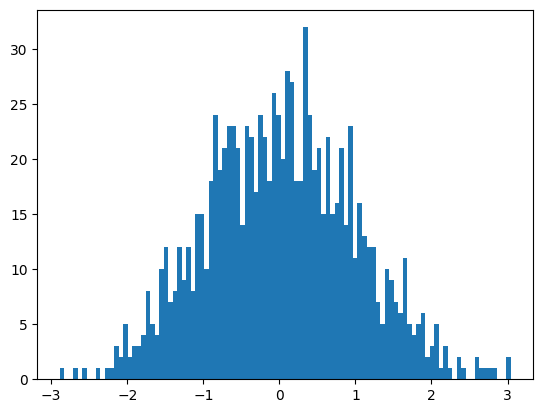

In [ ]:
plt.hist(np.log(X), bins=100)
plt.show()

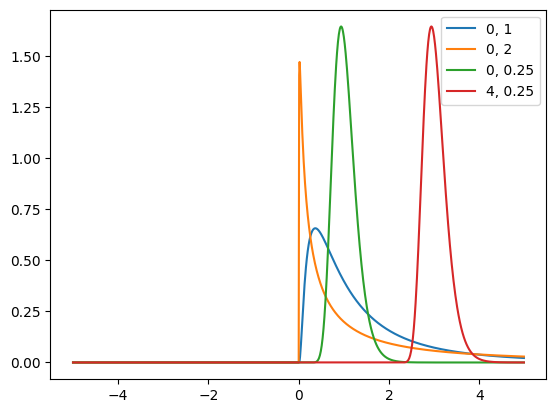

In [ ]:
x = np.arange(-5, 5, 0.01)

plt.plot(x, lognorm.pdf(x, [1],loc=0), label ='0, 1')
plt.plot(x, lognorm.pdf(x, [2],loc=0), label ='0, 2')
plt.plot(x, lognorm.pdf(x, [0.25],loc=0), label ='0, 0.25')
plt.plot(x, lognorm.pdf(x, [0.25],loc=2), label ='4, 0.25')

plt.legend()

## Как по данным узнать параметры распределения?

Чуть выше мы увидели, что андийские данные неплохо описываются при помощи распределения Пуассона с параметром λ = 2.783. Как получить это число?

<BarContainer object of 13 artists>

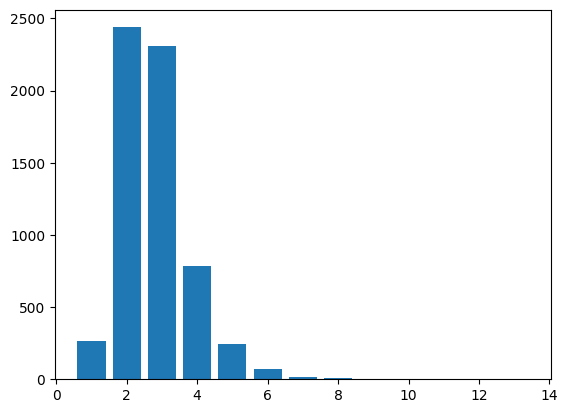

In [ ]:
plt.bar(andic_syllables[andic_syllables['language']=='Andi']['n_syllables'],
        andic_syllables[andic_syllables['language']=='Andi']['count'])

In [ ]:
sylls = []
n_syll = andic_syllables[andic_syllables['language']=='Andi']['n_syllables'].to_list()
count = andic_syllables[andic_syllables['language']=='Andi']['count'].to_list()
for i in range(len(n_syll)):
    sylls.extend([n_syll[i]] * count[i])
len(sylls)

6144

In [ ]:
dist = poisson
data = sylls
bounds = [(0, 5)]  # это для указания границ возможного
# (полезно, если нужно зафиксировать один из параметров)
res = scipy.stats.fit(dist, data, bounds)
res

  params: FitParams(mu=2.7827147854209295, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'

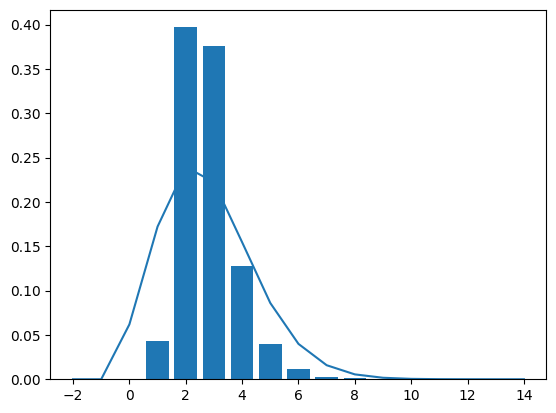

In [ ]:
plt.bar(andic_syllables[andic_syllables['language']=='Andi']['n_syllables'],
        andic_syllables[andic_syllables['language']=='Andi']['count']/6144)

x = np.arange(-2, 15, 1)
plt.plot(x, poisson.pmf(x, mu=2.7827147854209295))

Длительность гласных американского английского из (Hillenbrand et al. 1995) можно описать логнормальным распределением с некоторыми параметрами

In [ ]:
vowels = pd.read_csv("https://raw.githubusercontent.com/agricolamz/2022_da4l/master/data/phonTools_hillenbrand_1995.csv")
vowels

,type,speaker,vowel,dur,f0,f1,f2,f3
0,b,1,{,257,238,630,2423,3166
1,b,1,A,212,241,831,1676,2602
2,b,1,O,242,247,725,1384,2642
3,b,1,E,184,214,713,2095,3129
4,b,1,e,222,230,534,2690,3335
...,...,...,...,...,...,...,...,...
1663,w,139,i,314,231,437,2778,3139
1664,w,139,o,361,239,720,1277,2812
1665,w,139,U,273,236,553,1135,2859
1666,w,139,V,262,213,811,1450,2938


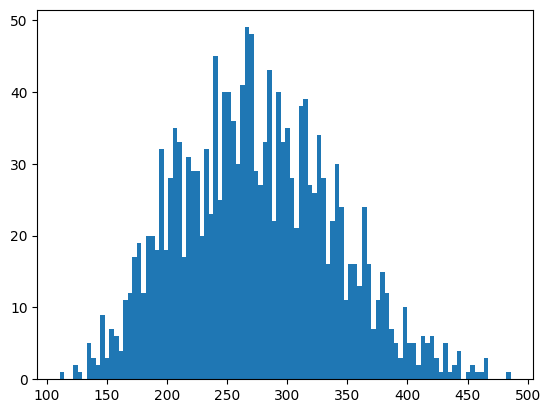

In [ ]:
plt.hist(vowels['dur'].to_list(), bins=100)
plt.show()

In [ ]:
vowels['dur'].mean(), vowels['dur'].std(ddof=0), vowels['dur'].std(ddof=1)

(274.6726618705036, 64.48166914328733, 64.50100687625866)

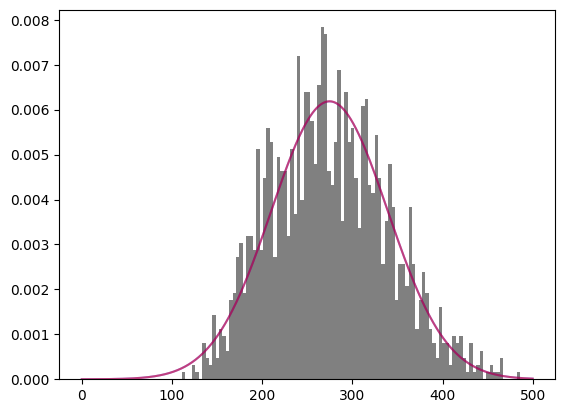

In [ ]:
x = np.arange(0, 500, 0.1)
plt.plot(x, norm.pdf(x, 274.6726618705036, 64.50100687625866), alpha=0.5, color='blue')
plt.plot(x, norm.pdf(x, 274.6727179427413, 64.48174058417379), alpha=0.5, color='red')
plt.hist(vowels['dur'], bins=100, density=True, color='grey')
plt.show()

In [ ]:
dist = norm
data = vowels['dur'].to_list()
bounds = [(0, 1000), (0, 1000)]  # это для указания границ возможного
# (полезно, если нужно зафиксировать один из параметров)
res = scipy.stats.fit(dist, data, bounds)
res

  params: FitParams(loc=274.6727179427413, scale=64.48174058417379)
 success: True
 message: 'Optimization terminated successfully.'

In [ ]:
dist = lognorm
data = vowels['dur'].to_list()
bounds = [(0, 1000), (0, 1000), (0, 1000)]  # это для указания границ возможного
# (полезно, если нужно зафиксировать один из параметров)
res = scipy.stats.fit(dist, data, bounds)
res

  params: FitParams(s=0.25634115794008494, loc=6.157703414275659, scale=264.28952910160984)
 success: True
 message: 'Optimization terminated successfully.'

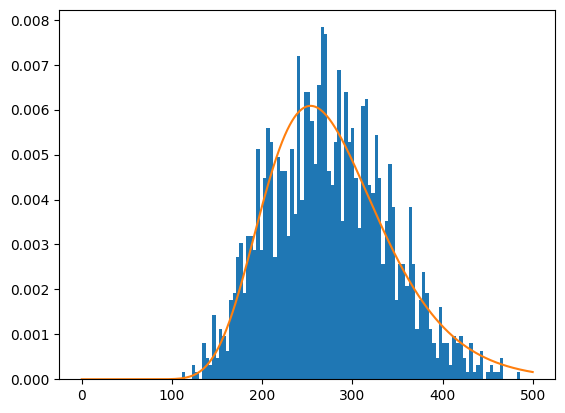

In [ ]:
plt.hist(vowels['dur'].to_list(), bins=100, density=True)

x = np.arange(0, 500, 0.1)
plt.plot(x, lognorm.pdf(x, s=0.25634115794008494,
                        loc=6.157703414275659,
                        scale=264.28952910160984))

## Смешанные модели

In [ ]:
! pip install reliability

Имеется датасет сообщений

In [ ]:
spam_sms = pd.read_csv("https://raw.githubusercontent.com/agricolamz/2022_da4l/master/data/spam_sms.csv")
spam_sms['sms_len'] = spam_sms['message'].apply(lambda x: len(x))
spam_sms

,type,message,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will �_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


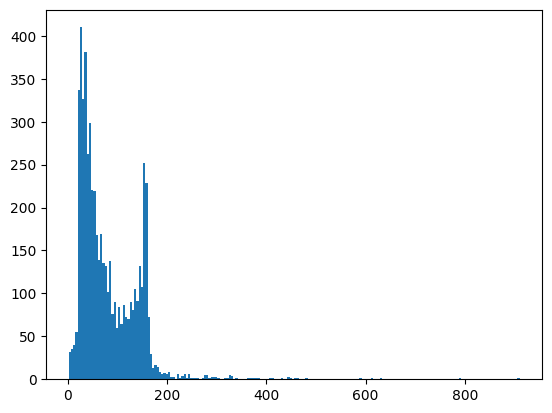

In [ ]:
plt.hist(spam_sms['sms_len'], bins=200)
plt.show()

Почему так странно? Каким распределением описать?

Дело в том, что в наших данных две группы: спам и настоящие сообщения.

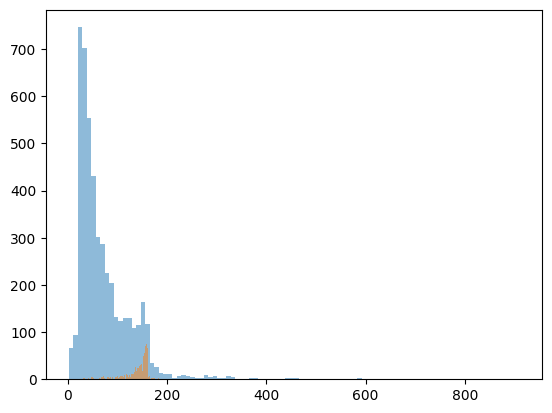

In [ ]:
plt.hist(spam_sms[spam_sms['type']=='ham']['sms_len'], bins=100, alpha=0.5)
plt.hist(spam_sms[spam_sms['type']=='spam']['sms_len'], bins=100, alpha=0.5)

plt.show()

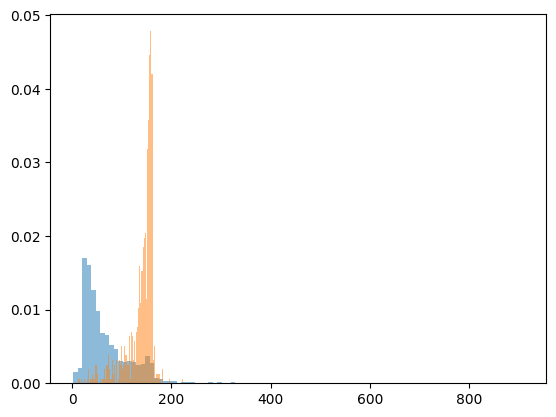

In [ ]:
plt.hist(spam_sms[spam_sms['type']=='ham']['sms_len'], density=True, bins=100, alpha=0.5)
plt.hist(spam_sms[spam_sms['type']=='spam']['sms_len'], density=True, bins=100, alpha=0.5)

plt.show()

Значит, нам нужна смешанная модель, то есть смесь распределений.

Ниже идёт пример смешанной модели, состоящей из логнормального распределения, гамма распределения и распределения Ве́йбулла. Причём в пропорциях 0.3, 0.4, 0.3 соответственно.

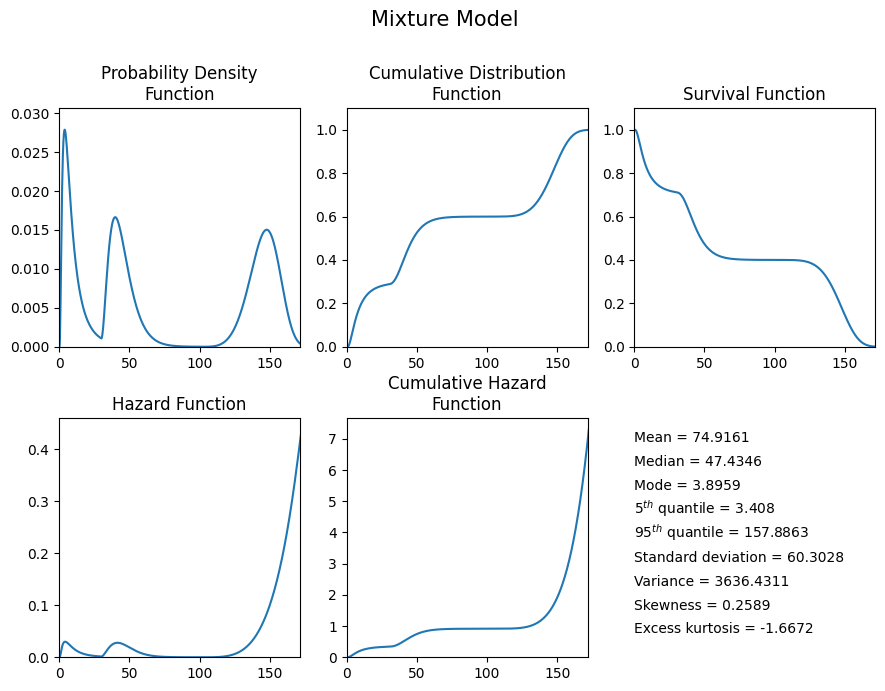

In [ ]:
from reliability.Distributions import Lognormal_Distribution, Gamma_Distribution, Weibull_Distribution, Mixture_Model

# create the mixture model
d1 = Lognormal_Distribution(mu=2, sigma=0.8)
d2 = Weibull_Distribution(alpha=50, beta=5, gamma=100)  # распределение Ве́йбулла
d3 = Gamma_Distribution(alpha=5, beta=3, gamma=30)

mixture_model = Mixture_Model(distributions=[d1, d2, d3], proportions=[0.3, 0.4, 0.3])

# plot the 5 functions using the plot() function
mixture_model.plot()

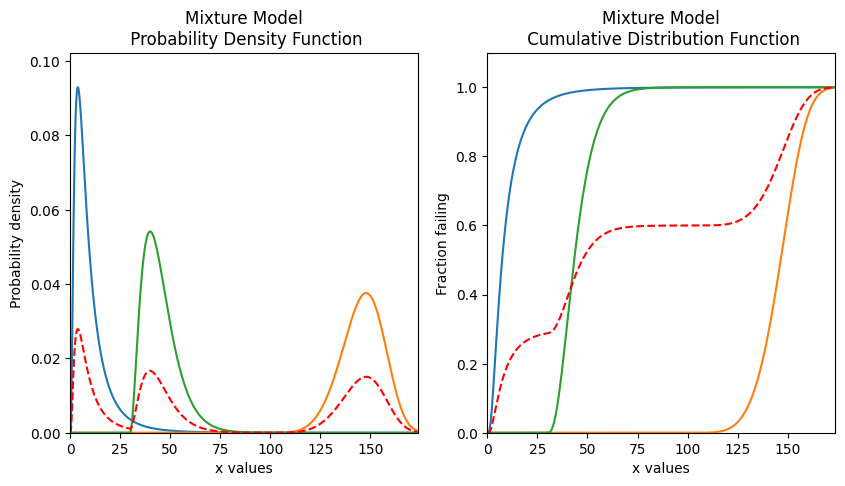

The mean of the distribution is: 74.91607709895403


In [ ]:
# plot the PDF and CDF
plot_components = True # this plots the component distributions. Default is False
plt.figure(figsize=(9, 5))
plt.subplot(121)
mixture_model.PDF(plot_components=plot_components, color='red', linestyle='--')
plt.subplot(122)
mixture_model.CDF(plot_components=plot_components, color='red', linestyle='--')
plt.subplots_adjust(left=0.1, right=0.95)
plt.show()

# extract the mean of the distribution
print('The mean of the distribution is:', mixture_model.mean)

 ## В чём крутость нормального распределения?

 Согласно центральной предельной теореме (ЦПТ, central limit theorem), какой бы ни была форма распределения в генеральной совокупности, выборочное распределение средних будет стремиться к нормальному. При этом чем больше размер выборки, тем ближе выборочное распределение средних будет к нормальному!

 См. интерактив: https://gallery.shinyapps.io/CLT_mean/

Про доверительный интервал см. интерактив: https://rpsychologist.com/d3/ci/